# 陣列運算

上一堂課的回測，大家是否都注意到雖然我們的結果是正確的，程式執行的時間卻很慢呢？

針對不同量級的資料，我們需要用不同的做法去解決問題，資料越大，我們就需要用聰明的方法做事

要加快程式的做法有很多種，像是用時間複雜度較好的演算法

但是演算法在實作上**十分困難**，而且若處理的資料量太小，很難看出時間上的差異

另一種做法是懂得利用資料結構，像是**陣列**(或者以 Python 的説法：List)

In [1]:
import xlwings as xw
import time

In [2]:
# 以我們上一堂課的 Excel 檔案爲例，打開你的 tsmc_back_test.xlsx 檔案
wb = xw.Book(r'C:\Users\user\Desktop\PYTHON_EXCEL_L3\tsmc_back_test.xlsx')
wb

<Book [tsmc_back_test.xlsx]>

In [3]:
tsmc_sheet = wb.sheets['2330']

result_sheet = wb.sheets['result']

In [4]:
# 我們可以算出所有的日報酬率
from xlwings.constants import Direction

num_of_rows = tsmc_sheet.range('B1').end(Direction.xlDown).row
num_of_rows

# 記錄時間，time.time() 就像是按碼錶，把執行到它的那一刻的時間記錄下來
ts = time.time()

for i in range(3, num_of_rows+1):
    daily_return = (result_sheet.cells(i, 2).value - result_sheet.cells(i-1, 2).value) / result_sheet.cells(i-1, 2).value
    result_sheet.cells(i, 3).value = daily_return

# 把回圈的跑完的時間記錄下來
td = time.time()
td - ts

4.406799793243408

# 其實這個速度很慢...
- 原因是讀寫 Excel 試算表内的資料是很費時的
- 若想加速，需要**減少讀寫 Excel 資料的次數**
- 一個簡單的原則：**當程式碼出現一次 .value, 我們的程式就會需要讀寫一次 Excel
- 所以目前的程式碼是讀寫 4 x N 次

# 這時我們就可以使用 Python 的 List (清單) 來解決執行效能的問題

- List (清單) 其實就是一般程式語言的 Array (陣列) 只是用了不同的名字 
- 可以一次性的截取出所有的收盤價，存入 list，這樣當 Python 在進行運算時
- 可以到陣列讀取值，而非到 Excel 試算表讀取 Excel 的資料

## list (清單)

arr = [224.5, 224.5, 233.0, 237.5, 237.5, 238.0]

| arr   |  224.5 |224.5  | 233.0   | 237.5   | 237.5   | 238.0 |
| ------ | --- | --- | --- | --- | --- | --- |
| 索引值 | 0   | 1   | 2   | 3   | 4   | 5   |

```python
arr[0]
# 會回傳 224.5
arr[5]
# 會回傳 237.5
```

---
## .append()

把資料加到清單的最後面：

```
ary = [1,2,3]
ary.append(4)
```
最後產生的 list 就會是：
```python
[1, 2, 3, 4]
```

---

## slicing (切片)

Slicing 就是取出一個陣列部分裏面的單個或多個值

實作方法是，**ary[起始的索引值 : 結束的索引值+1]**

```python
ary[0:3]
```
0 代表起始的索引值、3代表結束的索引值的後面一個值

最後就會得到 
```python
[1,2,3]
```

In [5]:
ary = [1, 2, 3, 4]
print(ary[0])
ary.append(5)
print(ary)
ary[0:3]

1
[1, 2, 3, 4, 5]


[1, 2, 3]

In [11]:
# expand='down' 表示會自動從 B2 開始，往下搜尋到最後一個有值的儲存格，以陣列的形式回傳
tsmc_price = tsmc_sheet.range('B2').options(expand='down').value
tsmc_price

[224.5,
 224.5,
 233.0,
 237.5,
 237.5,
 238.0,
 235.5,
 237.5,
 239.0,
 237.5,
 239.0,
 238.0,
 238.0,
 236.0,
 239.0,
 243.0,
 243.0,
 242.5,
 241.0,
 239.0,
 239.5,
 244.0,
 242.5,
 241.0,
 240.5,
 239.5,
 240.0,
 237.5,
 238.0,
 241.5,
 238.5,
 243.0,
 242.0,
 242.5,
 244.0,
 237.0,
 234.0,
 234.5,
 226.0,
 231.0,
 234.0,
 232.5,
 227.0,
 226.5,
 227.0,
 231.0,
 231.0,
 227.5,
 227.5,
 227.5,
 227.5,
 227.5,
 230.5,
 224.5,
 225.0,
 225.0,
 227.5,
 228.5,
 226.0,
 225.0,
 226.0,
 229.5,
 232.5,
 239.5,
 240.0,
 242.0,
 242.0,
 236.5,
 235.0,
 237.0,
 240.0,
 240.5,
 242.0,
 248.5,
 255.5,
 261.5,
 266.0,
 258.0,
 258.0,
 255.0,
 258.5,
 253.0,
 255.0,
 259.5,
 259.5,
 253.0,
 239.0,
 240.0,
 238.5,
 232.5,
 236.5,
 242.5,
 239.5,
 245.0,
 246.5,
 246.0,
 243.0,
 240.0,
 241.5,
 250.0,
 247.0,
 249.5,
 250.5,
 254.0,
 259.0,
 257.0,
 255.0,
 255.0,
 255.0,
 253.0,
 252.0,
 251.0,
 245.0,
 243.5,
 251.0,
 245.0,
 244.0,
 246.0,
 247.0,
 246.0,
 244.0,
 245.0,
 245.5,
 248.0,
 245.0,


In [6]:
# 先宣告一個空陣列
return_values= []

# 從第二筆資料(索引值為1)開始
for i in range(1, len(tsmc_price)):
    # 取得當天的收盤價
    today_Price= tsmc_price[i]
    # 取得前一天的收盤價
    yesterday_price = tsmc_price[i-1]
    # 算出報酬率
    return_value = (today_price - yesterday_price) / yesterday_price
    # 將報酬率存入陣列
    return_values.append(return_value)
    
return_values

NameError: name 'tsmc_price' is not defined

In [13]:
# 接下來我們就可以歡天喜地的把陣列賦值給 C3 到 C114 這個範圍了

result_sheet.range("C3").value = return_values

# 但是結果有點出乎我們的意料...

![](https://www.dropbox.com/s/tgsno7c6d6jiyaq/range_wrong.PNG?dl=1)

- 原因是陣列是以 row-based，但是我們想要賦值的範圍是 column-based

若你執行以下程式碼：
```python
result_sheet.range("A1:B2").value
```
就會回傳
```python
[['日期', '收盤價'], [datetime.datetime(2017, 10, 5, 0, 0), 224.5]]
```
在 Excel 的世界，任何一個二維 range 的值，就是用一個**二維陣列(也就是在陣列裏放另一個陣列)來表示**

- 而目前 return_values 這個陣列的大小是 1 x 111 
- 我們需要有一個方法把 return_values 的大小轉換成 111 x 1

In [7]:
result_sheet.range("A1:B2").value

[['日期', '收盤價'], [datetime.datetime(2017, 10, 5, 0, 0), 224.5]]

In [8]:
# 我們需要把 sma 的每一個值分別放入一個 list，一個 list 代表一個 row 的值
# 這些代表 row 的 list 最後會被放入另一個 list, 成爲一個二維陣列
values2d = [[227.33333333],
            [231.66666667],
            [236.        ]]

result_sheet.range("C3").value = values2d

# 在這裏就和各位介紹 Numpy 

這時就介紹一下 Numpy，它是 Python 的一個重要模組，主要用於資料處理上。Numpy 底層以 C 和 Fortran 語言實作，所以能快速操作多重維度的陣列。

因爲 Numpy 這個殺手級模組的出現，讓 Python 語言在資料科學與科研的領域大受歡迎。

- 在這個範例我們就來看如何利用 **Numpy** 這個熱門的科學運算套件所提供的資料結構

In [9]:
# 引用 numpy
import numpy as np

## numpy.reshape()

改變一個陣列的維度

假設原本我們有一個 1 x 6 的陣列：

```python
[0, 1, 2, 3, 4, 5]
```

我們將該陣列轉成一個 **numpy** 的陣列

```python
np.array(ary)
```

array([0, 1, 2, 3, 4, 5])

再用 **reshape** 把它變成一個 3 x 2 的陣列

```python
np.array(ary).reshape(3,2)
```

最後的陣列就會變成：

```python
array([[0, 1],
       [2, 3],
       [4, 5]])
```

In [10]:
ary = [0, 1, 2, 3, 4, 5]
np.array(ary)

array([0, 1, 2, 3, 4, 5])

In [11]:
np.array(ary).reshape(6,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [12]:
# expand='down' 表示會自動從 B2 開始，往下搜尋到最後一個有值的儲存格，以陣列的形式回傳
tsmc_price = tsmc_sheet.range('B2').options(expand='down').value
tsmc_price

[224.5,
 224.5,
 233.0,
 237.5,
 237.5,
 238.0,
 235.5,
 237.5,
 239.0,
 237.5,
 239.0,
 238.0,
 238.0,
 236.0,
 239.0,
 243.0,
 243.0,
 242.5,
 241.0,
 239.0,
 239.5,
 244.0,
 242.5,
 241.0,
 240.5,
 239.5,
 240.0,
 237.5,
 238.0,
 241.5,
 238.5,
 243.0,
 242.0,
 242.5,
 244.0,
 237.0,
 234.0,
 234.5,
 226.0,
 231.0,
 234.0,
 232.5,
 227.0,
 226.5,
 227.0,
 231.0,
 231.0,
 227.5,
 227.5,
 227.5,
 227.5,
 227.5,
 230.5,
 224.5,
 225.0,
 225.0,
 227.5,
 228.5,
 226.0,
 225.0,
 226.0,
 229.5,
 232.5,
 239.5,
 240.0,
 242.0,
 242.0,
 236.5,
 235.0,
 237.0,
 240.0,
 240.5,
 242.0,
 248.5,
 255.5,
 261.5,
 266.0,
 258.0,
 258.0,
 255.0,
 258.5,
 253.0,
 255.0,
 259.5,
 259.5,
 253.0,
 239.0,
 240.0,
 238.5,
 232.5,
 236.5,
 242.5,
 239.5,
 245.0,
 246.5,
 246.0,
 243.0,
 240.0,
 241.5,
 250.0,
 247.0,
 249.5,
 250.5,
 254.0,
 259.0,
 257.0,
 255.0,
 255.0,
 255.0,
 253.0,
 252.0,
 251.0,
 245.0,
 243.5,
 251.0,
 245.0,
 244.0,
 246.0,
 247.0,
 246.0,
 244.0,
 245.0,
 245.5,
 248.0,
 245.0,


In [14]:
# 引用 numpy
import numpy as np

# 先將 return_values 轉換成 numpy array
return_array = np.array(return_values)
return_array

array([], dtype=float64)

In [15]:
array_length = len(return_array)
array_length

0

In [16]:
# 接下來我們就用 reshape(row, column) 改變陣列大小
return_array = return_array.reshape(array_length, 1)
return_array

array([], shape=(0, 1), dtype=float64)

In [21]:
"""
現在當你需要把所有的報酬率寫入 C欄，你的做法可能會是：
result_sheet.range("C3:C114").value = return_array
最後在針對 range 賦值時，xlwings 只需指定起點，也就是最上面的 cell
若你的 range 是二維陣列，就是左上角的 cell
"""
result_sheet.range("C3").value = return_array

In [18]:
# 最後我們來測試陣列運算所花費的時間
ts_array = time.time()

return_values = []

for i in range(1, len(tsmc_price)):
    today_price = tsmc_price[i]
    yesterday_price = tsmc_price[i-1]
    return_value = (today_price - yesterday_price)/yesterday_price
    return_values.append(return_value)

result_sheet.range("C3").value = return_array

td_array = time.time() 

td_array - ts_array

0.003999948501586914

In [19]:
print("時間差距：{}倍".format((td - ts)/(td_array - ts_array)))

時間差距：1101.714132443226倍


In [22]:
# 接下來我們就來計算3日移動平均

# 先宣告一個空陣列
sma = []

# 從陣列的第三個值開始計算
for i in range(3, len(tsmc_price)+1):
    # 一次取出三天的收盤價，算出平均值，再用 append 加入陣列
    mean = sum(tsmc_price[i-3:i]) / len(tsmc_price[i-3:i])
    print(mean)
    
# 當然，這個做法有點土炮，畢竟 numpy 已經提供了很好用的功能可以用來計算平均值

227.33333333333334
231.66666666666666
236.0
237.66666666666666
237.0
237.0
237.33333333333334
238.0
238.5
238.16666666666666
238.33333333333334
237.33333333333334
237.66666666666666
239.33333333333334
241.66666666666666
242.83333333333334
242.16666666666666
240.83333333333334
239.83333333333334
240.83333333333334
242.0
242.5
241.33333333333334
240.33333333333334
240.0
239.0
238.5
239.0
239.33333333333334
241.0
241.16666666666666
242.5
242.83333333333334
241.16666666666666
238.33333333333334
235.16666666666666
231.5
230.5
230.33333333333334
232.5
231.16666666666666
228.66666666666666
226.83333333333334
228.16666666666666
229.66666666666666
229.83333333333334
228.66666666666666
227.5
227.5
227.5
228.5
227.5
226.66666666666666
224.83333333333334
225.83333333333334
227.0
227.33333333333334
226.5
225.66666666666666
226.83333333333334
229.33333333333334
233.83333333333334
237.33333333333334
240.5
241.33333333333334
240.16666666666666
237.83333333333334
236.16666666666666
237.33333333333334
2

## numpy.mean()

計算一個 np array 的平均值
```python
ary = [1, 2, 3]
np_array = np.array(ary)

np.mean(np_array)
```
就會把 np_array 的平均值，也就是 2.0 算出來

In [25]:
sma = []
# 從陣列的第三個值開始計算
for i in range(3, len(tsmc_price)+1):
    # 一次取出三天的收盤價，算出平均值，再用 append 加入陣列
    mean = sum(tsmc_price[i-3:i]) / len(tsmc_price[i-3:i])
    sma.append(mean)
    print(sma)

# 最後再把我們的結果轉成 N x 1 大小的陣列
sma_array = np.array(sma).reshape(len(sma),1)
# 最後寫回 D 欄
result_sheet = wb.sheets['result']
result_sheet.range('D4').value = sma_array

[227.33333333333334]
[227.33333333333334, 231.66666666666666]
[227.33333333333334, 231.66666666666666, 236.0]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0, 237.0]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0, 237.0, 237.33333333333334]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0, 237.0, 237.33333333333334, 238.0]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0, 237.0, 237.33333333333334, 238.0, 238.5]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0, 237.0, 237.33333333333334, 238.0, 238.5, 238.16666666666666]
[227.33333333333334, 231.66666666666666, 236.0, 237.66666666666666, 237.0, 237.0, 237.33333333333334, 238.0, 238.5, 238.16666666666666, 238.33333333333334]
[227.33333333333334, 231.66666666666666, 236.0

# range().options() 功能

除了能夠用 expand 自動偵測範圍以外，options 也能讓開發者指定資料的型別

```python
# 從 B2 往下查找，回傳一個 np.array 陣列
tsmc_sheet.range('B2').options(np.array, expand='down')
```

In [26]:
# expand='down' 表示會自動從 B2 開始，往下搜尋到最後一個有值的儲存格，以 np.array的形式回傳
tsmc_price = tsmc_sheet.range('B2').options(np.array, expand='down').value
tsmc_price

array([224.5, 224.5, 233. , 237.5, 237.5, 238. , 235.5, 237.5, 239. ,
       237.5, 239. , 238. , 238. , 236. , 239. , 243. , 243. , 242.5,
       241. , 239. , 239.5, 244. , 242.5, 241. , 240.5, 239.5, 240. ,
       237.5, 238. , 241.5, 238.5, 243. , 242. , 242.5, 244. , 237. ,
       234. , 234.5, 226. , 231. , 234. , 232.5, 227. , 226.5, 227. ,
       231. , 231. , 227.5, 227.5, 227.5, 227.5, 227.5, 230.5, 224.5,
       225. , 225. , 227.5, 228.5, 226. , 225. , 226. , 229.5, 232.5,
       239.5, 240. , 242. , 242. , 236.5, 235. , 237. , 240. , 240.5,
       242. , 248.5, 255.5, 261.5, 266. , 258. , 258. , 255. , 258.5,
       253. , 255. , 259.5, 259.5, 253. , 239. , 240. , 238.5, 232.5,
       236.5, 242.5, 239.5, 245. , 246.5, 246. , 243. , 240. , 241.5,
       250. , 247. , 249.5, 250.5, 254. , 259. , 257. , 255. , 255. ,
       255. , 253. , 252. , 251. , 245. , 243.5, 251. , 245. , 244. ,
       246. , 247. , 246. , 244. , 245. , 245.5, 248. , 245. , 244.5,
       245. , 243.5,

# numpy 陣列相乘

傳統上若我們要用陣列做 element-wise 的運算...

```python
km_list = [3, 5, 10, 21, 42.195]
km_to_mile = 0.621371192
mile_list = []
# 一定需要一個 for loop 
for km in km_list:
    mile_list.append(km * km_to_mile)

print(mile_list)
```

用 lambda 函數也沒有好到那裏去...

```python
km_list = [3, 5, 10, 21, 42.195]
mile_list = list(map(lambda x: x * 0.621371192, km_list))
print(mile_list)
```

但是今天你若是使用 numpy array...

```python
km_list = [3, 5, 10, 21, 42.195]
km_array = numpy.array(km_list)
print(type(km_array))
km_to_mile = 0.621371192
# 讓一個 numpy 裏面的每一筆資料都與常數 km_to_mile 相乘
# 使用 numpy, 語法非常直覺！
mile_array = km_array * km_to_mile
print(mile_array)
```


# 隨堂練習
- 請用 numpy 練習計算這五個人的 BMI
- 回傳的多筆 bmi 值必須是一個陣列
```python
 heights = [173, 168, 171, 189, 179]
weights = [65.4, 59.2, 63.6, 88.4, 68.7]
```

---

In [39]:
heights = [173, 168, 171, 189, 179]
heights_array=np.array(heights)
print(type(heights_array))
weights = [65.4, 59.2, 63.6, 88.4, 68.7]
weights_array=np.array(weights)
print(type(weights_array))

BMI=weights_array/(heights_array/100)**2
print(BMI)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[21.85171573 20.97505669 21.75028214 24.7473475  21.44127836]


In [31]:
km_list = [3, 5, 10, 21, 42.195]
km_array=np.array(km_list)
print(type(km_array))
km_to_mile = 0.621371192
mile_array=km_array * km_to_mile
print(mile_array)
#用Python原廠資料很難達成


<class 'numpy.ndarray'>
[ 1.86411358  3.10685596  6.21371192 13.04879503 26.21875745]


In [49]:
# 接下來我們就來計算 5日加權移動平均

# 需要將權重與價格兩兩相乘
weights = np.arange(1, 6)
print(weights)

prices = tsmc_price[tsmc_price[i-5:i]]
print(prices)

# 使用 weight * prices, 將陣列的數依照順序兩兩相乘, 非常强大！
weights * prices

[1 2 3 4 5]


IndexError: arrays used as indices must be of integer (or boolean) type

# 隨堂練習

```python
# 算出所有的 5日加權移動平均,寫入 E 欄
wma = []

weights = list(range(1,6))

for i in range(5, len(tsmc_price)+1):
    prices = ______________
    
    result = _________________________
    wma.append(result)

wma_array = np.array(wma).reshape(len(wma), 1)
result_sheet.range((6, 'E')).value = wma_array
```

In [86]:
# 算出所有的 5日加權移動平均,寫入 E 欄
wma = []


weights = list(range(1,6))
weight_array = np.array(weights)

for i in range(6, len(tsmc_price)+1):
    prices_array = list(tsmc_price[i-5:i])
    result = sum(weight_array* prices_array)/ sum(weight_array)
    wma.append(result)

# 最後寫回 E 欄
result_sheet = wb.sheets['result']
wma_array = np.array(wma).reshape(len(wma), 1)
result_sheet.range((6, 'E')).value = wma_array

# 小結
- 陣列運算相對不直覺，但是**運算效能卻會大幅提升**
- numpy 這個强大的套件就在功能和效能上補足了原廠 python list 的不足之處

補充教材：

[numpy 套件官網](http://www.numpy.org/)

# 資料視覺化

今天我們手上已經有了許多資料，但是受到生活的限制，很多時候我們對數字是無感的

因此，把資料視覺化，像是產生圖表，就成了一個重要并且值得研究的議題

In [52]:
# xlwings 直接整合了 Excel 原廠的 Chart 物件 
chart = result_sheet.charts.add()
# 使用 expand 將試算表内所有、連續的資料撈出
chart.set_source_data(result_sheet.range('A1').expand())
chart.chart_type = 'line'
chart.top = result_sheet.range('K5').top

# Matplotlib

Python 開發者社群最被廣汎使用的繪圖套件，功能强大

In [57]:
import matplotlib.pyplot as plt

plt.ylabel('some numbers')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [58]:
tsmc_sheet = wb.sheets['result']
time_series = tsmc_sheet.range('A2').options(np.array, expand='down').value
time_series

array([datetime.datetime(2017, 10, 5, 0, 0),
       datetime.datetime(2017, 10, 6, 0, 0),
       datetime.datetime(2017, 10, 11, 0, 0), '2017/10/12', '2017/10/13',
       '2017/10/16', '2017/10/17', '2017/10/18', '2017/10/19',
       '2017/10/20', '2017/10/23', '2017/10/24', '2017/10/25',
       '2017/10/26', '2017/10/27', '2017/10/30', '2017/10/31',
       '2017/11/01', '2017/11/02', '2017/11/03', '2017/11/06',
       '2017/11/07', '2017/11/08', '2017/11/09', '2017/11/10',
       '2017/11/13', '2017/11/14', '2017/11/15', '2017/11/16',
       '2017/11/17', '2017/11/20', '2017/11/21', '2017/11/22',
       '2017/11/23', '2017/11/24', '2017/11/27', '2017/11/28',
       '2017/11/29', '2017/11/30', datetime.datetime(2017, 12, 1, 0, 0),
       datetime.datetime(2017, 12, 4, 0, 0),
       datetime.datetime(2017, 12, 5, 0, 0),
       datetime.datetime(2017, 12, 6, 0, 0),
       datetime.datetime(2017, 12, 7, 0, 0),
       datetime.datetime(2017, 12, 8, 0, 0), '2017/12/09', '2017/12/10',
      

In [64]:
ma_3d = tsmc_sheet.range('D2').options(np.array, expand='down').value
ma_3d

array(nan)

Text(0,0.5,'Price')

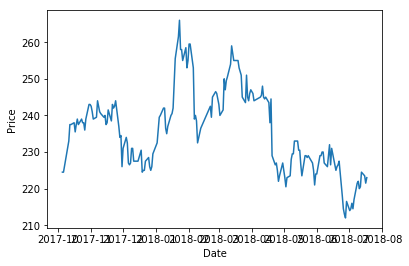

In [65]:
fig = plt.figure()
plt.plot(time_series, tsmc_price)
plt.xlabel('Date')
plt.ylabel('Price')

In [66]:
result_sheet.pictures.add(fig, name="Closing Price vs Date")

ShapeAlreadyExists: 

# 成功將圖加到了 Excel 上面

![](https://www.dropbox.com/s/hkr2r8r8vn98msj/matplot_first_try.PNG?dl=1)

但是圖的位置將一部分的資料蓋住了...

In [69]:
# 設定圖的左邊與上面的位置
plot = result_sheet.pictures.add(fig,name="Closing Price vs Date",
                     left=result_sheet.range('F10').left, top=result_sheet.range('F10').top)

In [70]:
# 若覺得圖太大...

plot.height /= 2
plot.width /= 2